In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

### Get latest data from nytimes:

In [3]:
df_counties = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

df_states = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [4]:
df_counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
df_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [6]:
df_states.date = pd.to_datetime(df_states.date)
df_counties.date = pd.to_datetime(df_counties.date)

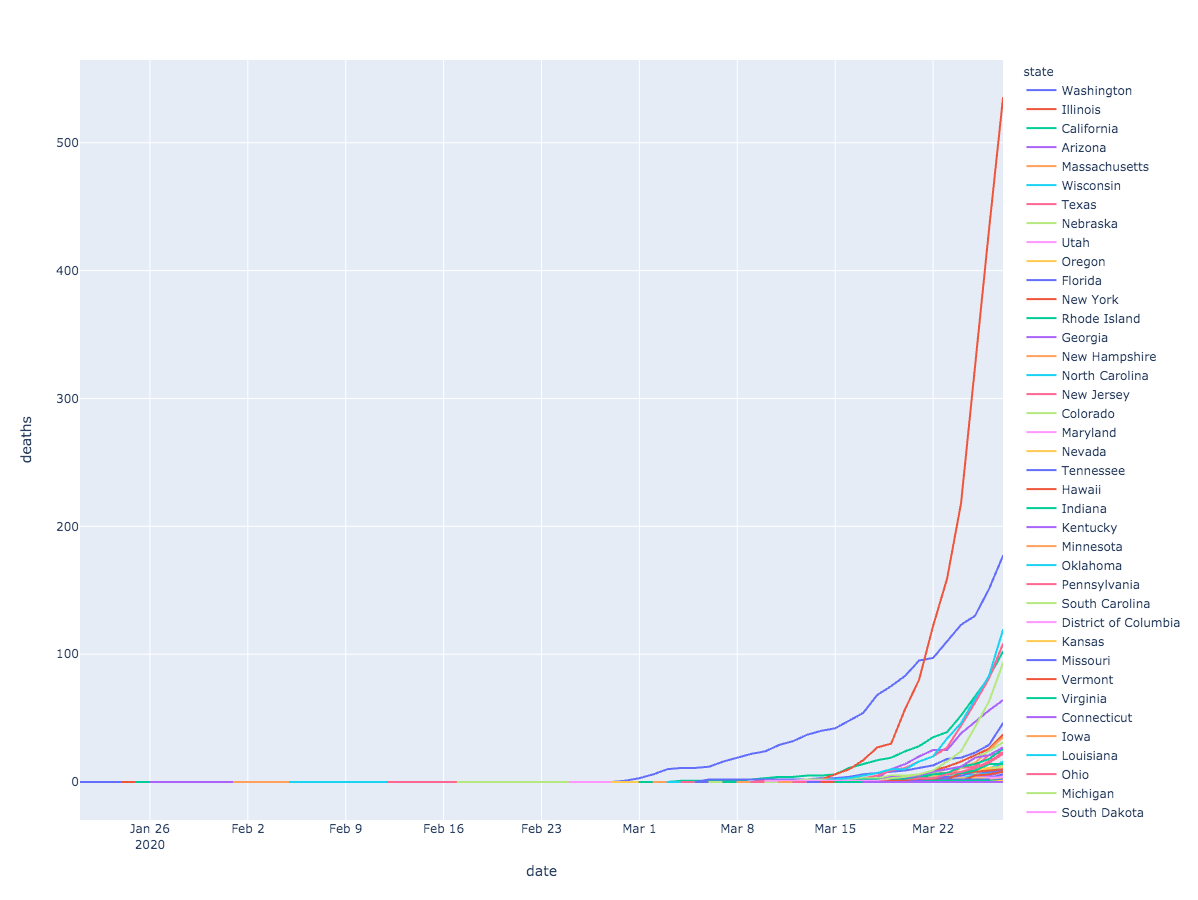

In [42]:
px.line(df_states, x='date', y='deaths', color="state",width=900, height=900)

In [8]:
df_states.date_shift = df_states[df_states.deaths > 10].index[0]

In [9]:
df2 = df_states.pivot(index='date', columns='state', values='deaths').reset_index()

In [10]:
df3 = df2.copy()

In [11]:
df3.head()

state,date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2020-01-25,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [48]:
df3 = df2.copy().drop(columns=['date'])
for state in df2.columns[1:]:
    #print(state)
    try:
        #chose 9 days b/c with threshold of exactly 10, Michigan has an odd start position
        start_date = df3[df3[state] >= 9].index[0]
        df3[state] = df3[state].shift(-start_date)
    except:
        start_date = 0
        #print("not yet >10; skipping ")
        df3 = df3.drop(state, axis=1)
df3.index.name = 'days'

In [49]:
df3 = df3.dropna(how='all')

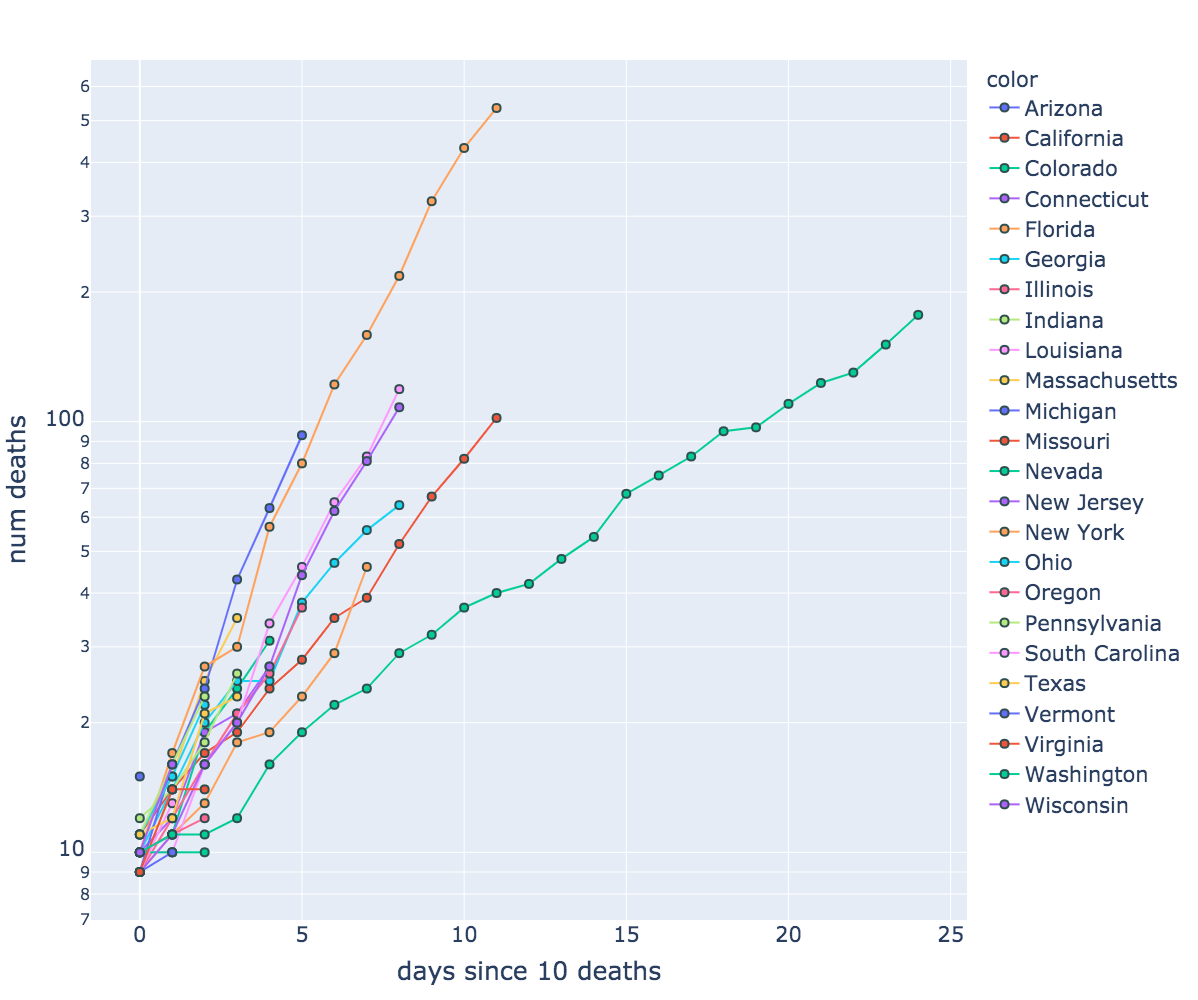

In [68]:
plt = px.scatter(x=plot_df.days, y=plot_df.value, color=plot_df.state, 
              width=1000, height=1000, 
              log_y=True,
              labels=dict(y='num deaths', x='days since 10 deaths')
            )

plt.update_traces(mode='lines+markers',
                  marker=dict(size=8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')))
plt.update_layout(font=dict(
        size=21))
plt.show()